# Chapter 2. Data and Sampling Distributions

필요한 패키지들을 설치 및 불러오기 합니다.

In [1]:
!pip install statsmodels
!pip install wquantiles

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

데이터를 불러오기 위한 경로를 설정합니다. 반드시 필요한 csv 파일이 경로 상에 위치해야 파일을 불러올 수 있습니다.

In [3]:
DATA = "C:/Users/HwanKam/hyundai/data"

In [4]:
LOANS_INCOME_CSV = DATA + '/loans_income.csv'
SP500_DATA_CSV = DATA + '/sp500_data.csv.gz'

## CLT

https://openintro.shinyapps.io/CLT_mean/

## sample

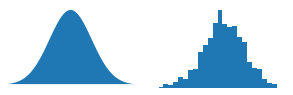

In [5]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

## Sampling Distribution of a Statistic

In [6]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(100).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())
print(results.tail())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data
       income        type
995  69604.79  Mean of 20
996  72313.64  Mean of 20
997  67056.23  Mean of 20
998  69612.78  Mean of 20
999  70270.33  Mean of 20


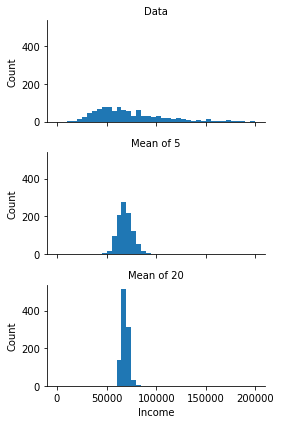

In [7]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## Bootstrap

https://mattkmiecik.shinyapps.io/boot-perm-app/

In [8]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


## Confidence Intervals

68760.51844
55734.1


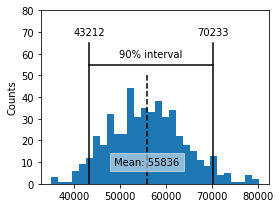

In [9]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

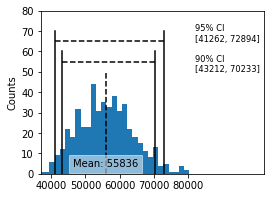

In [10]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

## Standard Normal and QQ-Plots

scipy 패키지 내의 함수 scipy.stats.probplot 를 활용해서 QQ-plot을 그릴 수 있습니다.(정규성 확인)

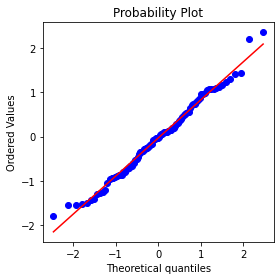

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

np.random.seed(88)
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

(array([1., 3., 3., 3., 1., 1., 8., 5., 4., 3., 6., 7., 6., 9., 7., 4., 6.,
        1., 5., 3., 6., 3., 1., 2., 0., 0., 0., 0., 1., 1.]),
 array([-1.78977226, -1.65142539, -1.51307852, -1.37473166, -1.23638479,
        -1.09803792, -0.95969106, -0.82134419, -0.68299732, -0.54465045,
        -0.40630359, -0.26795672, -0.12960985,  0.00873701,  0.14708388,
         0.28543075,  0.42377762,  0.56212448,  0.70047135,  0.83881822,
         0.97716508,  1.11551195,  1.25385882,  1.39220569,  1.53055255,
         1.66889942,  1.80724629,  1.94559315,  2.08394002,  2.22228689,
         2.36063376]),
 <BarContainer object of 30 artists>)

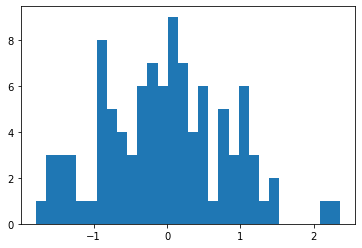

In [12]:
plt.hist(norm_sample, bins=30)

### Long-Tailed Distributions

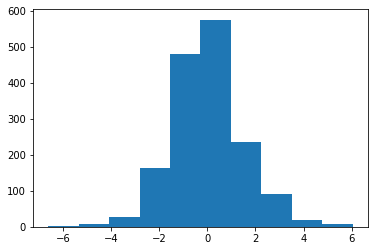

In [13]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

plt.hist(nflx)
plt.show()

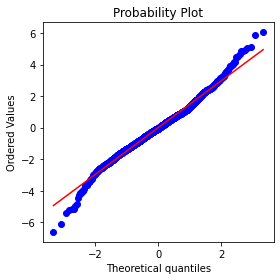

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

$ \$

[참고] *특정분포에서 분위수에 해당하는 score 찾기, 확률 찾기, 누적확률 찾기는 다음과 같다.*

from scipy import stats

stats.분포.ppf(분위수, loc = , scale = )

stats.분포.pmf(값, loc = , scale =)

stats.분포.pdf(값, loc = , scale =)

stats.분포.cdf(값, loc = , scale =)

정규분포 : norm // 포아송분포 : poisson // 이항분포 : binom // 기하분포 : geom // 지수분포 : expon

## 실습

위의 nflx로 입력받은 array를 사용해서 직접 QQ_plot을 만들어보자.

## 실습 

강의자료 <정규분포> 부분에 나온 문제를 풀어보자.

[문제] 수능 한국지리 점수는 평균이 40, 표준편차가 4인 정규분포를 따른다고 하자. 

* BTS 정국이 46점을 받았다고 할 때 백분위수는 어떻게 되는가?

* 정국이 1등급(상위 4%)를 받기 위해서는 최소한 몇점을 받아야 하는가? 

## Binomial Distribution

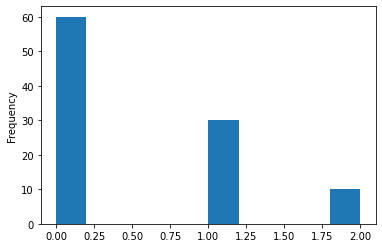

In [15]:
sample = stats.binom.rvs(n = 5, p=0.1, size=100)

pd.Series(sample).plot.hist()
plt.show()

In [16]:
print(stats.binom.pmf(0, n=5, p=0.1))

0.59049


In [17]:
print(stats.binom.pmf(3, n=5, p=0.1))

0.008099999999999996


In [18]:
print(stats.binom.cdf(3, n=5, p=0.1))

0.99954


In [19]:
print(stats.binom.ppf(0.7, n=5, p=0.1))

1.0


## 실습 

강의자료 <이항분포> 부분에 나온 문제를 풀어보자.

[문제] 한 연구에 따르면 약 25%의 페이스북 사용자를 파워사용자로 분류한다. 또한 사용자들의 평균 친구숫자는 245명이다. 245명의 친구를 가진 사용자 중 파워 사용자가 70명을 초과할 확률은 얼마인가? 이항분포 및 정규근사를 사용해서 각각 풀어보시오.

## Poisson Distributions

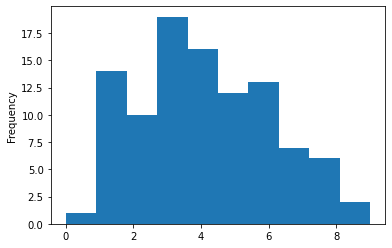

In [20]:
sample = stats.poisson.rvs(4, size=100)

pd.Series(sample).plot.hist()
plt.show()

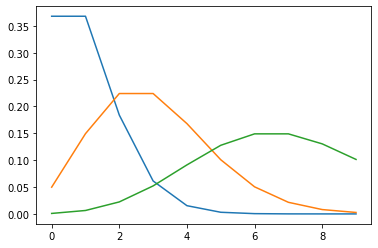

In [21]:
x = np.arange(10)
y1 = stats.poisson.pmf(x, mu=1)
y2 = stats.poisson.pmf(x, mu=3)
y3 = stats.poisson.pmf(x, mu=7)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

## 실습

강의자료 <포아송분포> 부분에 나온 문제를 풀어보자.

[문제] 국토교통부에 따르면 2017년 1억 km당 주요 철도사고의 발생건수는 평균 6회이다. 올해의 사건횟수의 분포도 2017년과 비슷할 것이라는 가정하에

* 올해 1억 km 당 사건이 7번 발생할 확률은?

* 올해 1억 km 당 사건이 20번 이상일 확률은? 　　   ※포아송분포가 이산형 분포임에 주의

## Geometric Distribution

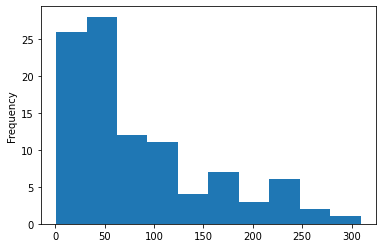

In [22]:
sample = stats.geom.rvs(0.01, size=100)

pd.Series(sample).plot.hist()
plt.show()

## 실습

강의자료 <기하분포> 부분에 나온 문제를 풀어보자.

[문제] 맛있는 녀석들이 쪼는 맛을 하는 게임을 하고 있다. 영식이 형이 주사위를 던져서 1, 또는 6의 눈이 나온 사람이 쪼는 맛에 당첨이라고 얘기해주었다. 가위바위보 결과 주사위를 던지는 순서는 민상, 준현, 민경, 세윤으로 정해졌다. 민경 또는 세윤이 쪼는 맛에 당첨될 확률은?

## 실습


[문제] 주머니 안에 N개의 흰 공과 M개의 검은 공이 있다고 하자. 공을 한번에 하나씩 꺼내어 색깔을 확인한 뒤, 주머니에 공을 다시 집어넣는 과정을 반복한다. 만약 검은색 공이 나오면 시행을 멈춘다고 할때

* 정확히 n번의 시행을 할 확률을 찾는 함수를 만들어라

* 최소한 k번의 시행을 할 확률을 찾는 함수를 만들어라.

단, stat.geom을 사용하지 마시오

## Exponential Distribution

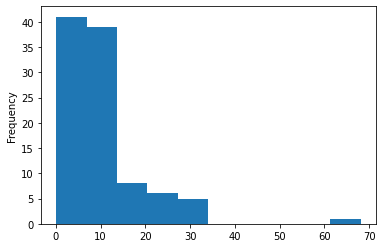

In [23]:
sample = stats.expon.rvs(scale=10, size=100)

pd.Series(sample).plot.hist()
plt.show()

## 실습

강의자료 <지수분포> 부분에 나온 문제를 풀어보자.

[문제] 듀폰 공장에서 10년동안 생긴 사고에 대해 알아보고자 한다. 사고 간격에 대한 분포가 지수분포를 따른다고 가정하자. 사건발생비율 $\lambda$(일별 사고 발생률)가 0.05라고 가정했을 때,



 * 사고 간격이 10일 이내일 확률은?


  * 80일 이상 사고가 없을 확률은?

## 실습


[문제] 은행 업무를 보기 위해 순서를 기다리는 상황을 생각해보자. 은행업무를 볼 때까지 기다리는 시간은 지수분포를 따르며 은행원은 1분당 0.1명의 업무를 응대한다고 가정하자. 

* 당신이 은행에 막 도착했을 때 은행에서 10분 이상 기다릴 확률은? 

* 당신이 이미 10분을 기다렸을 때 추가로 10분 이상 기다릴 확률은?